In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from reinforce_algo import PolicyGradientAgent as Agent

In [5]:
def plot_learning_curve(scores, x):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')

In [3]:
if __name__ == '__main__':
    best_score = -np.inf
    env = gym.make('CartPole-v0')
    agent = Agent(lr=0.0005, gamma=0.99, n_actions=env.action_space.n, fc1_dims=128, fc2_dims=128)
    


    num_episodes = 1000
    score_history = []

    for i in range(num_episodes):
        done = False
        score = 0
        observation = env.reset()
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            agent.store_transition(observation, action, reward)
            observation = observation_
            score += reward
        score_history.append(score)

        agent.learn()
        avg_score = np.mean(score_history[-100:])
        if avg_score > best_score:
            best_score = score

        print('episode {} score {:.1f} avg score {:.1f}'.
              format(i, score, avg_score))    

episode 0 score 14.0 avg score 14.0
episode 1 score 22.0 avg score 18.0
episode 2 score 23.0 avg score 19.7
episode 3 score 15.0 avg score 18.5
episode 4 score 15.0 avg score 17.8
episode 5 score 19.0 avg score 18.0
episode 6 score 15.0 avg score 17.6
episode 7 score 24.0 avg score 18.4
episode 8 score 13.0 avg score 17.8
episode 9 score 15.0 avg score 17.5
episode 10 score 17.0 avg score 17.5
episode 11 score 47.0 avg score 19.9
episode 12 score 13.0 avg score 19.4
episode 13 score 24.0 avg score 19.7
episode 14 score 13.0 avg score 19.3
episode 15 score 29.0 avg score 19.9
episode 16 score 13.0 avg score 19.5
episode 17 score 28.0 avg score 19.9
episode 18 score 11.0 avg score 19.5
episode 19 score 13.0 avg score 19.1
episode 20 score 12.0 avg score 18.8
episode 21 score 12.0 avg score 18.5
episode 22 score 26.0 avg score 18.8
episode 23 score 18.0 avg score 18.8
episode 24 score 34.0 avg score 19.4
episode 25 score 88.0 avg score 22.0
episode 26 score 29.0 avg score 22.3
episode 27 

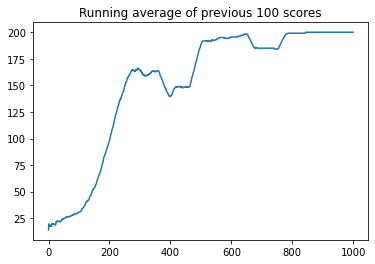

In [7]:
x = [i for i in range(num_episodes)]
plot_learning_curve(score_history, x)